In [1]:
from datasets import load_dataset, concatenate_datasets
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

/home/infres/abounhar/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load dataset
dataset_1 = load_dataset("atlasia/mldr-moroccan-darija-nano", split="train")
dataset_2 = load_dataset("atlasia/miracl-moroccan-darija-nano", split="train")

Generating train split: 100%|██████████| 2863/2863 [00:00<00:00, 49337.86 examples/s]


In [ ]:
dataset_1 = dataset_1.add_column('original_source', ['sentence-transformers/mldr'] * len(dataset_1))
dataset_1 = dataset_1.add_column('translation_model', ['BounharAbdelaziz/Terjman-Nano-v2.2'] * len(dataset_1))

dataset_2 = dataset_2.add_column('original_source', ['sentence-transformers/miracl'] * len(dataset_2))
dataset_2 = dataset_2.add_column('translation_model', ['BounharAbdelaziz/Terjman-Nano-v2.2'] * len(dataset_2))

In [8]:
dataset = concatenate_datasets([dataset_1, dataset_2])

In [9]:
dataset

Dataset({
    features: ['anchor', 'positive', 'negative', 'metadata', 'original_source', 'translation_model'],
    num_rows: 12863
})

In [10]:
# Define new column order
new_column_order = ["anchor", "positive", "negative", "original_source", "translation_model", "metadata"]

# Reorder dataset columns
dataset = dataset.select_columns(new_column_order)

In [11]:
dataset

Dataset({
    features: ['anchor', 'positive', 'negative', 'original_source', 'translation_model', 'metadata'],
    num_rows: 12863
})

In [12]:
dataset.push_to_hub('atlasia/Sentence-Transformers-Triplet-Morocco-Darija', commit_message=f'Translation of sentence-transformers/mldr and sentence-transformers/miracl using BounharAbdelaziz/Terjman-Nano-v2.2')

Uploading the dataset shards: 100%|██████████| 1/1 [00:13<00:00, 13.73s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/atlasia/Sentence-Transformers-Triplet-Morocco-Darija/commit/749d653c26debdf078704a4ab2d8a84499f85f17', commit_message='Translation of sentence-transformers/mldr and sentence-transformers/miracl using BounharAbdelaziz/Terjman-Nano-v2.2', commit_description='', oid='749d653c26debdf078704a4ab2d8a84499f85f17', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/atlasia/Sentence-Transformers-Triplet-Morocco-Darija', endpoint='https://huggingface.co', repo_type='dataset', repo_id='atlasia/Sentence-Transformers-Triplet-Morocco-Darija'), pr_revision=None, pr_num=None)

In [18]:
# Push each dataset separately with different config names
dataset['triplet'].push_to_hub(
    'atlasia/Sentence-Transformers-Triplet-Morocco-Darija',
    config_name='triplet',
    commit_message='Putting in triplet config'
)

Creating parquet from Arrow format: 100%|██████████| 37/37 [00:04<00:00,  7.69ba/s]


# Add data

In [1]:
from datasets import (
    load_dataset, 
    concatenate_datasets,
    Dataset,
    DatasetDict
)
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

/home/infres/abounhar/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
BASE_DATASET = 'sentence-transformers/all-nli--pair-score'
TRANS_MODEL = 'BounharAbdelaziz/Terjman-Ultra-v2.2'

In [10]:
new_dataset = load_dataset("atlasia/all-nli-pair-score-moroccan-darija-ultra", split="train")

Generating train split: 100%|██████████| 200000/200000 [00:01<00:00, 108491.43 examples/s]


In [12]:
new_dataset

Dataset({
    features: ['sentence1', 'sentence2', 'score', 'metadata'],
    num_rows: 200000
})

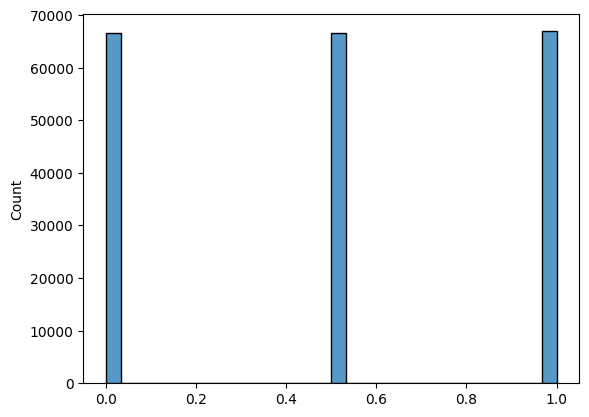

In [20]:
# plot distribution of scores
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(new_dataset['score'])
plt.show()

In [14]:
new_dataset = new_dataset.add_column('original_source', [BASE_DATASET] * len(new_dataset))
new_dataset = new_dataset.add_column('translation_model', [TRANS_MODEL] * len(new_dataset))

In [15]:
new_dataset

Dataset({
    features: ['sentence1', 'sentence2', 'score', 'metadata', 'original_source', 'translation_model'],
    num_rows: 200000
})

In [16]:
# Define new column order
new_column_order = ["sentence1", "sentence2", "score", "original_source", "translation_model", "metadata"]

# Reorder dataset columns
new_dataset = new_dataset.select_columns(new_column_order)

In [17]:
new_dataset[0]

{'sentence1': 'ولكن كتعرف--أنا تقريبا ما كنحبش نقول هادشي--"',
 'sentence2': 'ما مرتاحش نقول هاد الشي.',
 'score': 1.0,
 'original_source': 'sentence-transformers/all-nli--pair-score',
 'translation_model': 'BounharAbdelaziz/Terjman-Ultra-v2.2',
 'metadata': {'score': 1.0,
  'sentence1_en': 'But you know--I almost hate to say this--"',
  'sentence2_en': "I'm not all comfortable saying this."}}

In [19]:
new_dataset.push_to_hub(
    'atlasia/Sentence-Transformers-Morocco-Darija',
    config_name='pair-score',
    commit_message=f'Added (sentence1, sentence2, score) from {BASE_DATASET} using {TRANS_MODEL}'
)

Uploading the dataset shards: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/datasets/atlasia/Sentence-Transformers-Morocco-Darija/commit/e7eb8ffc94b87b96ec8640b721799125e2de4485', commit_message='Added (sentence1, sentence2, score) from sentence-transformers/all-nli--pair-score using BounharAbdelaziz/Terjman-Ultra-v2.2', commit_description='', oid='e7eb8ffc94b87b96ec8640b721799125e2de4485', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/atlasia/Sentence-Transformers-Morocco-Darija', endpoint='https://huggingface.co', repo_type='dataset', repo_id='atlasia/Sentence-Transformers-Morocco-Darija'), pr_revision=None, pr_num=None)